In [2]:


from bs4 import BeautifulSoup
import requests
import pandas as pd




In [3]:
url = 'https://www.asd-int.com/taux-de-tva-dans-lunion-europeenne-en-2023/'
page = requests.get(url)
soup = BeautifulSoup(page.text, 'html.parser')

In [4]:
container = soup.find('div', class_='elementor-shortcode')
print(container)


<div class="elementor-shortcode">
<table class="tablepress tablepress-id-170" id="tablepress-170">
<thead>
<tr class="row-1 odd">
<th class="column-1">État <br>membre</br></th><th class="column-2">Code <br/>pays</th><th class="column-3">Taux <br/>standard (%)</th><th class="column-4">Taux <br/>parking (%)</th><th class="column-5">Taux <br/>réduit 1 (%)</th><th class="column-6">Taux <br/>réduit 2 (%)</th><th class="column-7">Taux <br/>super-réduit (%)</th><th class="column-8">Taux <br/>Zéro (%)</th>
</tr>
</thead>
<tbody class="row-hover">
<tr class="row-2 even">
<td class="column-1">Allemagne</td><td class="column-2">DE</td><td class="column-3">19</td><td class="column-4">–</td><td class="column-5">–</td><td class="column-6">7</td><td class="column-7">–</td><td class="column-8">0</td>
</tr>
<tr class="row-3 odd">
<td class="column-1">Autriche</td><td class="column-2">AT</td><td class="column-3">20</td><td class="column-4">13</td><td class="column-5">13</td><td class="column-6">10</td><

In [5]:
table = container.find('table', class_='tablepress tablepress-id-170')
print(table)

<table class="tablepress tablepress-id-170" id="tablepress-170">
<thead>
<tr class="row-1 odd">
<th class="column-1">État <br>membre</br></th><th class="column-2">Code <br/>pays</th><th class="column-3">Taux <br/>standard (%)</th><th class="column-4">Taux <br/>parking (%)</th><th class="column-5">Taux <br/>réduit 1 (%)</th><th class="column-6">Taux <br/>réduit 2 (%)</th><th class="column-7">Taux <br/>super-réduit (%)</th><th class="column-8">Taux <br/>Zéro (%)</th>
</tr>
</thead>
<tbody class="row-hover">
<tr class="row-2 even">
<td class="column-1">Allemagne</td><td class="column-2">DE</td><td class="column-3">19</td><td class="column-4">–</td><td class="column-5">–</td><td class="column-6">7</td><td class="column-7">–</td><td class="column-8">0</td>
</tr>
<tr class="row-3 odd">
<td class="column-1">Autriche</td><td class="column-2">AT</td><td class="column-3">20</td><td class="column-4">13</td><td class="column-5">13</td><td class="column-6">10</td><td class="column-7">–</td><td clas

In [6]:
data_rows = []

# Parcourir toutes les lignes du tableau
for row in table.find_all('tr')[1:]:  # ajustez l'index selon si la première ligne est un en-tête ou non
    cells = row.find_all('td')  # ou 'th' si nécessaire pour les en-têtes
    data = [cell.text.strip() for cell in cells]  # Extraire le texte de chaque cellule
    data_rows.append(data)  # Ajouter la liste des données de la ligne à la liste des données


In [8]:
df = pd.DataFrame(data_rows)

In [11]:
df.columns = ['PAYS', 'CODE PAYS' , 'TVA_2023' , 'X' , 'Y' , 'Z' , 'W', 'A']



In [17]:
df = df.drop(columns= 'A')

In [25]:
df

,PAYS,CODE PAYS,TVA_2023
0,Allemagne,DE,19.0
1,Autriche,AT,20.0
2,Belgique,BE,21.0
3,Bulgarie,BG,20.0
4,Chypre,CY,19.0
5,Croatie,HR,25.0
6,Danemark,DK,25.0
7,Espagne,ES,21.0
8,Estonie,EE,20.0
9,Finlande,FI,24.0


In [35]:
# Remplacer les valeurs 'NaN' par '16'
df['TVA_2023'] = df['TVA_2023'].fillna(16)

In [36]:
df

,PAYS,CODE PAYS,TVA_2023
0,Allemagne,DE,19.0
1,Autriche,AT,20.0
2,Belgique,BE,21.0
3,Bulgarie,BG,20.0
4,Chypre,CY,19.0
5,Croatie,HR,25.0
6,Danemark,DK,25.0
7,Espagne,ES,21.0
8,Estonie,EE,20.0
9,Finlande,FI,24.0


float64


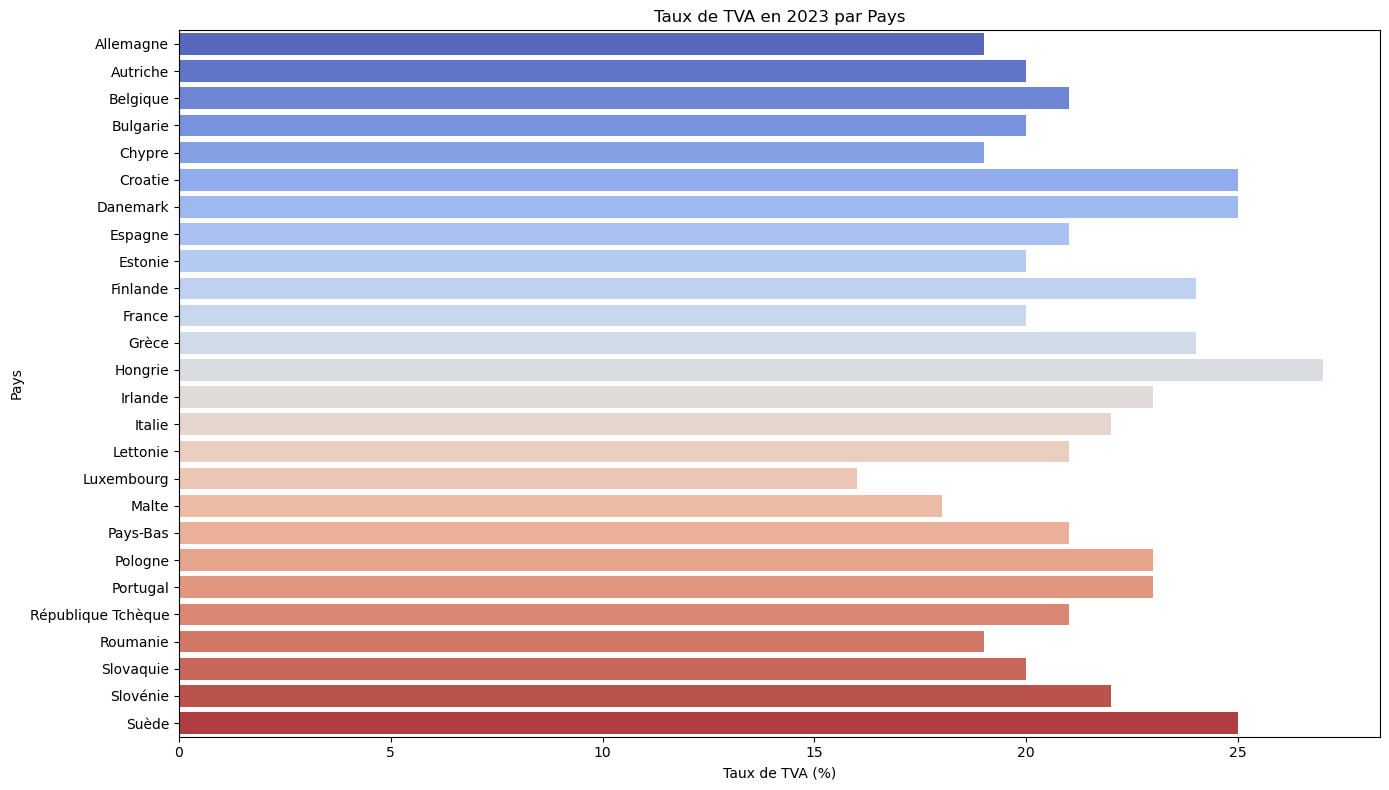

In [38]:
# Vérifiez le type de données de la colonne 'TVA_2023'
print(df['TVA_2023'].dtype)

# Si 'TVA_2023' n'est pas de type numérique, convertissez-le
df['TVA_2023'] = pd.to_numeric(df['TVA_2023'], errors='coerce')

# Tentez à nouveau de créer le diagramme en barres
plt.figure(figsize=(14, 8))
sns.barplot(x='TVA_2023', y='PAYS', data=df, palette='coolwarm')
plt.title('Taux de TVA en 2023 par Pays')
plt.xlabel('Taux de TVA (%)')
plt.ylabel('Pays')
plt.tight_layout()
plt.show()


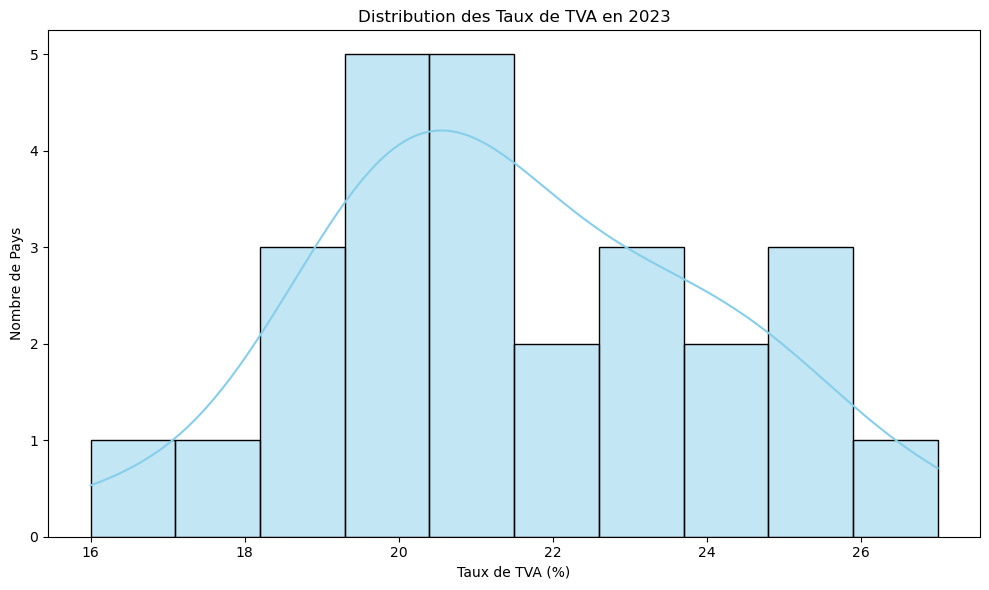

In [39]:
# Création d'un histogramme pour la distribution des taux de TVA
plt.figure(figsize=(10, 6))
sns.histplot(df['TVA_2023'], bins=10, kde=True, color='skyblue')
plt.title('Distribution des Taux de TVA en 2023')
plt.xlabel('Taux de TVA (%)')
plt.ylabel('Nombre de Pays')
plt.tight_layout()
plt.show()
